In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image 
import os
import random
import cv2

import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split 
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Flatten, BatchNormalization, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

Predspracovanie

In [2]:
Ycat = []
Ybin = []
labels = ['Normal', 'Lung_Opacity','Viral_Pneumonia','Tuberculosis','COVID']
#normal = 0, LO = 1, VP = 2, Tuberculosis = 3, COVID = 4
size = 256

def get_data(folder, Ycat, Ybin):
    x = 0
    data = []
    for label in labels: 
        path = os.path.join(folder, label)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(folder,label, images))[...,::-1]
            img = cv2.resize(img, (size, size))
            img = img.astype('float16')
            img /= 255
            data.append(img)
            category = np.zeros(5)
            category[x] = 1
            Ycat.append(category)
            if label == 'COVID':
                Ybin.append(1)
            else:
                Ybin.append(0)
        x = x + 1
    return data

In [3]:
Xdata = get_data('',Ycat, Ybin)

In [4]:
#Xdata = Xdata.sample(n=len(Xdata), random_state=1242)
#Ycat = Ycat.sample(n=len(Ycat), random_state=1242)
random.seed(151)
Xdata = random.sample(Xdata,len(Xdata))#3600)
random.seed(151)
Ycat=random.sample(Ycat,len(Ycat))#3600)
random.seed(151)
Ybin=random.sample(Ybin,len(Ybin))#3600)
X = np.array(Xdata)
Ycat = np.array(Ycat)
Ybin = np.array(Ybin)

In [ ]:
#Ycat = utils.to_categorical(labels,5)

Binary

In [5]:
xBin_train, xBin_test, yBin_train, yBin_test = train_test_split(X, Ybin, test_size=0.3, random_state=1)

In [6]:
model = Sequential()

model.add(Conv2D(16,3,padding="same", activation="relu", input_shape=(256,256,3)))

model.add(Conv2D(16, 3, padding="same", activation="relu"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,220,753
Trainable params: 134,220,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

In [7]:
adam = Adam()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])

In [8]:
#checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1)
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')

In [9]:
history = model.fit(xBin_train, yBin_train, epochs=5, validation_data=(xBin_test, yBin_test),callbacks=[checkpoint])

Epoch 1/5
479/479 [==============================] - ETA: 0s - loss: 0.9131 - accuracy: 0.8827
Epoch 00001: val_loss improved from inf to 0.22308, saving model to model.h5
479/479 [==============================] - 1098s 2s/step - loss: 0.9131 - accuracy: 0.8827 - val_loss: 0.2231 - val_accuracy: 0.9163
Epoch 2/5
479/479 [==============================] - ETA: 0s - loss: 0.2243 - accuracy: 0.9083
Epoch 00002: val_loss did not improve from 0.22308
479/479 [==============================] - 1014s 2s/step - loss: 0.2243 - accuracy: 0.9083 - val_loss: 0.2614 - val_accuracy: 0.8971
Epoch 3/5
479/479 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.9347
Epoch 00003: val_loss did not improve from 0.22308
479/479 [==============================] - 1002s 2s/step - loss: 0.1609 - accuracy: 0.9347 - val_loss: 0.2349 - val_accuracy: 0.9171
Epoch 4/5
479/479 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9605
Epoch 00004: val_loss did not improve from

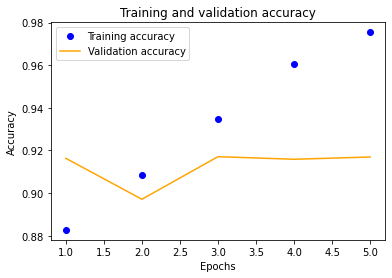

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(xBin_test)
#predictions = model.predict(xBin_test)
#predictions = predictions.reshape(1,-1)[0]

In [12]:
pred = [int(round(x[0])) for x in predictions]

In [13]:
print(yBin_test.shape)

(6560,)


In [14]:
print(classification_report(yBin_test, pred, target_names = ['Non-COVID (Class 0)','COVID (Class 1)']))

                     precision    recall  f1-score   support

Non-COVID (Class 0)       0.95      0.96      0.95      5449
    COVID (Class 1)       0.77      0.73      0.75      1111

           accuracy                           0.92      6560
          macro avg       0.86      0.84      0.85      6560
       weighted avg       0.92      0.92      0.92      6560



In [15]:
print('Confusion matrix : \n')
print(confusion_matrix(yBin_test, pred)) #(actual, predicted)

Confusion matrix : 

[[5204  245]
 [ 300  811]]


Categorical

In [5]:
xCat_train, xCat_test, yCat_train, yCat_test = train_test_split(X, Ycat, test_size=0.3, random_state=1)

In [6]:
Categorical_model = Sequential()

Categorical_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))

#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

Categorical_model.add(Flatten())
Categorical_model.add(Dense(128, activation='relu'))
Categorical_model.add(Dense(5, activation='softmax'))

Categorical_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 flatten (Flatten)           (None, 2064512)           0         
                                                                 
 dense (Dense)               (None, 128)               264257664 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 264,259,205
Trainable params: 264,259,205
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam = Adam()
#Categorical_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])
Categorical_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
f = Categorical_model.fit(xCat_train, yCat_train, epochs = 3, validation_data=(xCat_test, yCat_test))

Epoch 1/3
410/479 [========================>.....] - ETA: 2:40 - loss: 7.4537 - accuracy: 0.6940

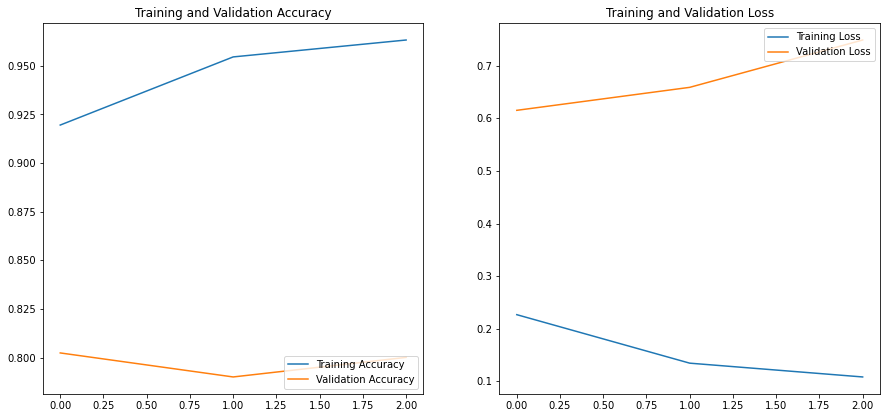

In [17]:
acc = f.history['accuracy']
val_acc = f.history['val_accuracy']
loss = f.history['loss']
val_loss = f.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

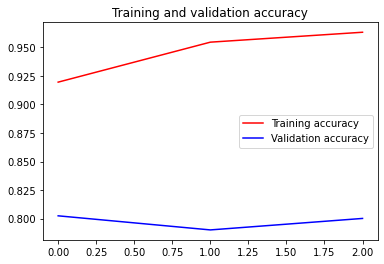

<Figure size 432x288 with 0 Axes>

In [16]:
acc = f.history['accuracy']
val_acc = f.history['val_accuracy']
loss = f.history['loss']
val_loss = f.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = Categorical_model.predict(xCat_test)
predicted = np.argmax(predictions, axis = 1)
yCat_test=np.argmax(yCat_test, axis=1)

In [27]:
print(predicted.shape)

(6560,)


In [ ]:
#print(pd.crosstab(y_test, predicted))
print(pd.crosstab(yCat_test, predicted))

In [ ]:
print(classification_report(yCat_test, predicted))

In [ ]:
print(classification_report(yCat_test, predictions))#,labels = labels, target_names = ['Normal', 'Lung_Opacity','Viral_Pneumonia','Tuberculosis','COVID']))